In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv('/content/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


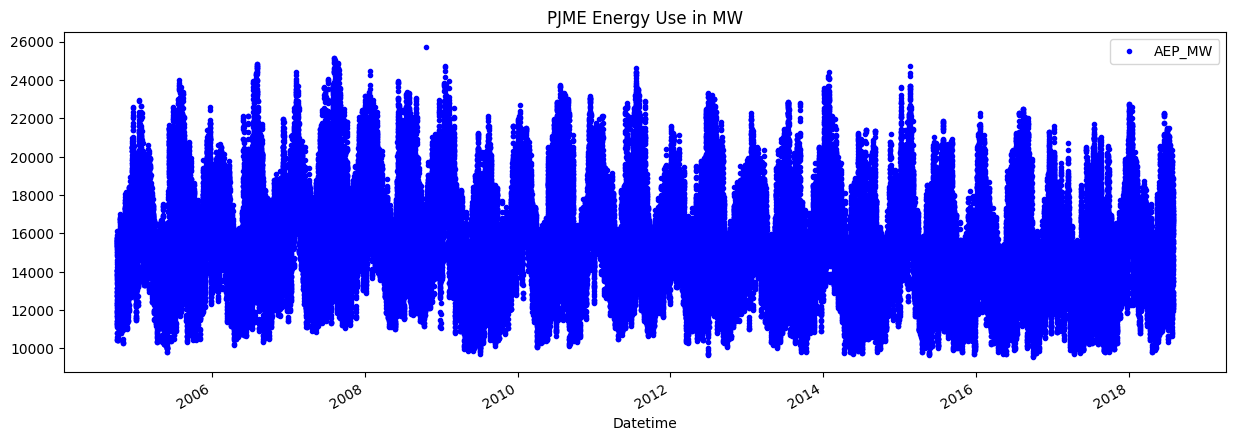

In [5]:
df.plot(style = '.',
        figsize = (15,5),
        color = 'blue',
        title = "PJME Energy Use in MW")
plt.show()

In [6]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

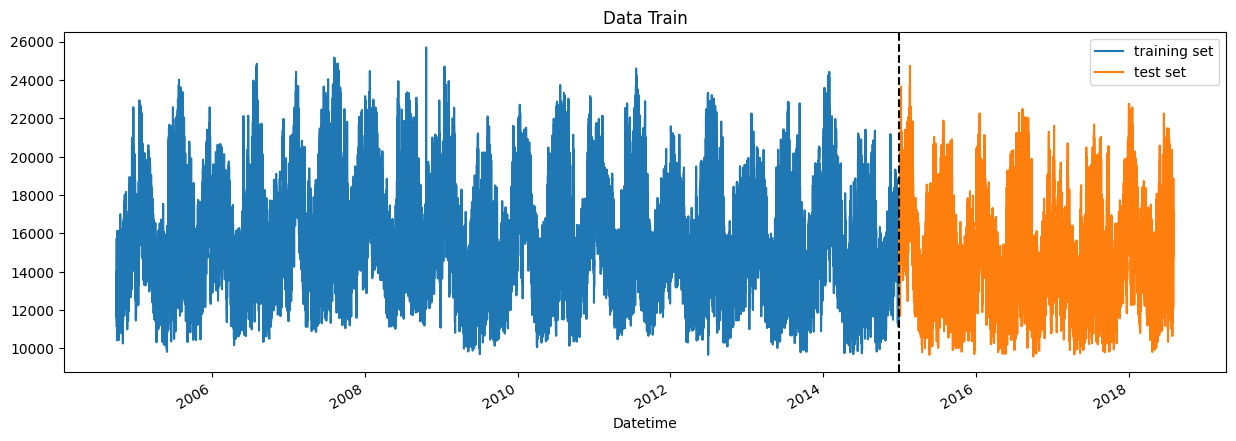

In [7]:
fig,ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax,label = "training set",title = 'Data Train')
test.plot(ax = ax,label = "test set")
ax.axvline('01-01-2015',color = 'black',ls = '--')
ax.legend(['training set','test set'])
plt.show()

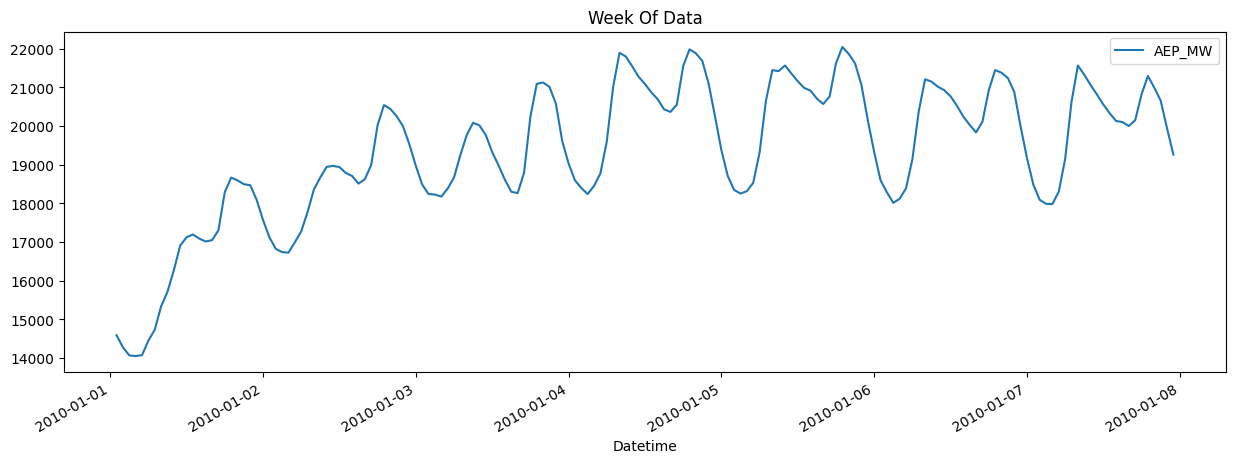

In [8]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')]\
.plot(figsize = (15,5),title = 'Week Of Data')
plt.show()

In [9]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [10]:
df = create_features(df)
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


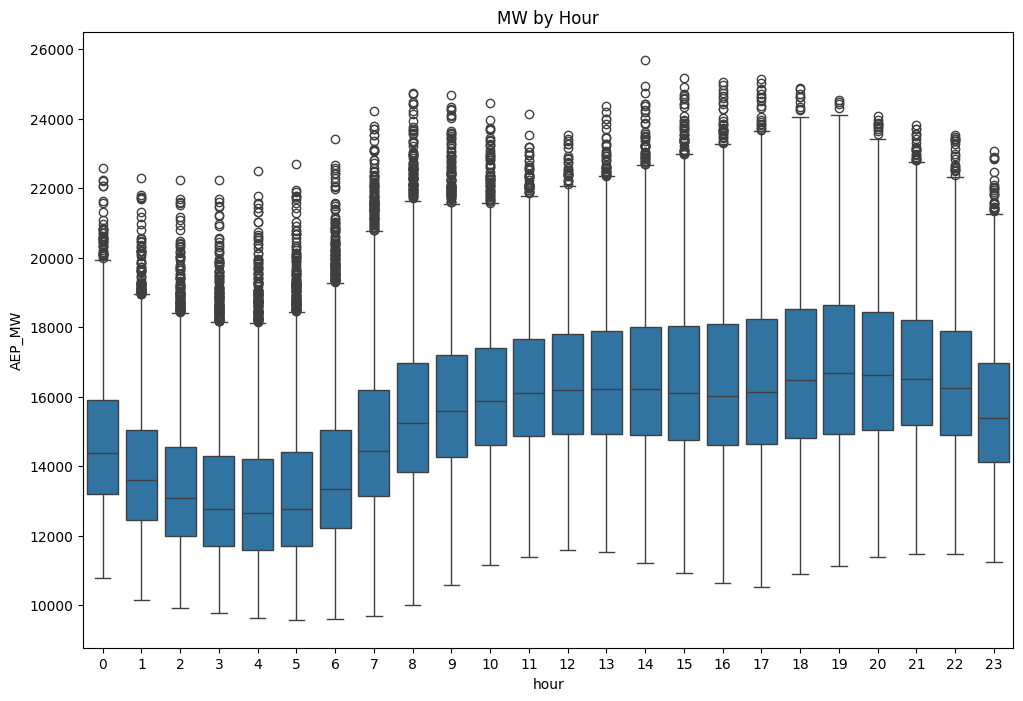

In [11]:
fig,ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = df,x='hour',y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

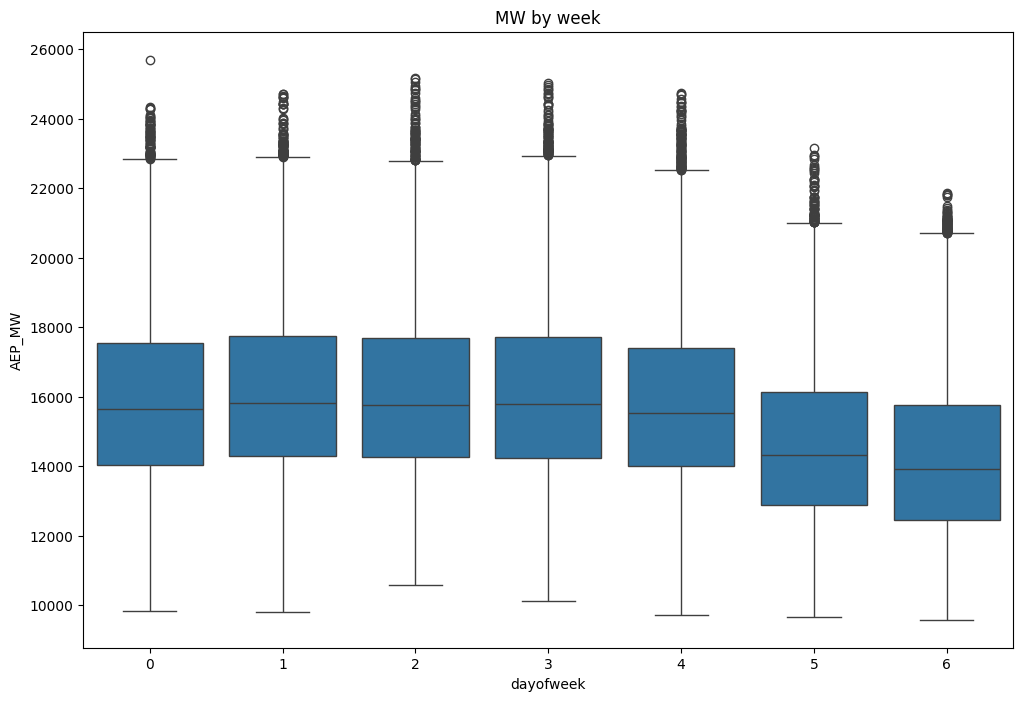

In [12]:
fig,ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = df,x='dayofweek',y='AEP_MW')
ax.set_title('MW by week')
plt.show()

In [48]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'prediction_x', 'prediction_y',
       'prediction', 'prediction_test', 'prediction_test', 'prediction_test'],
      dtype='object')

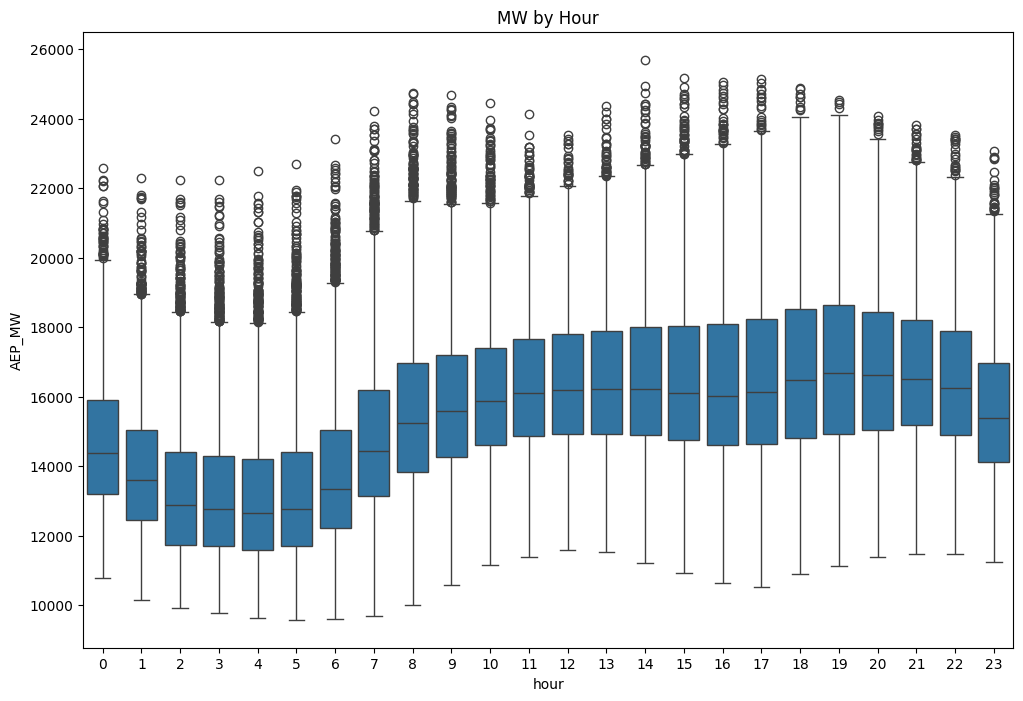

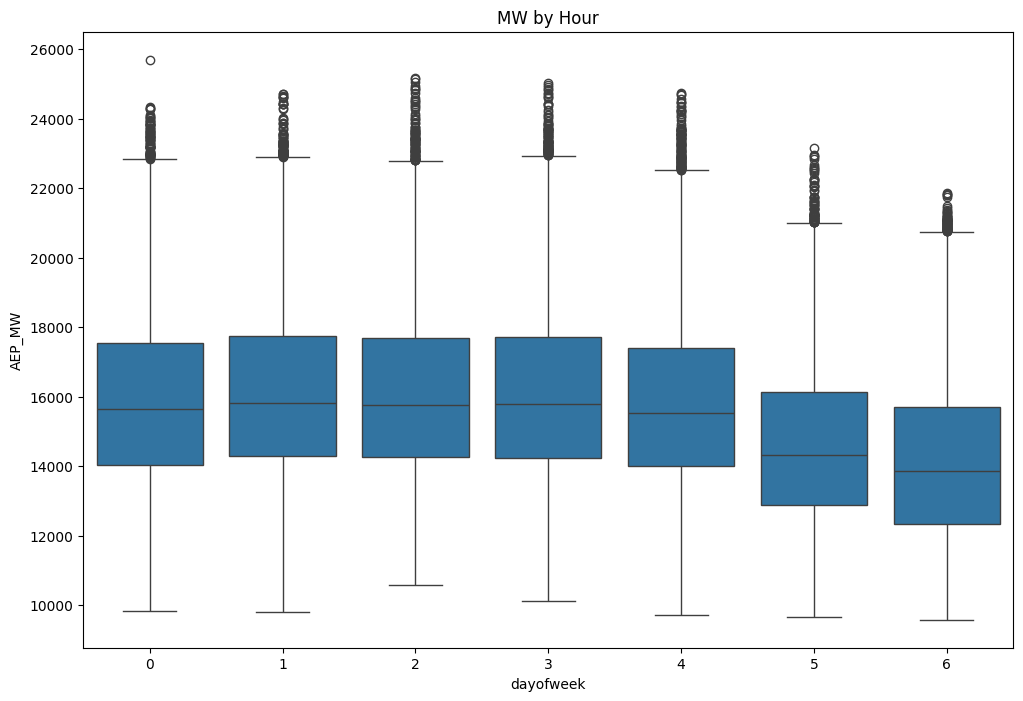

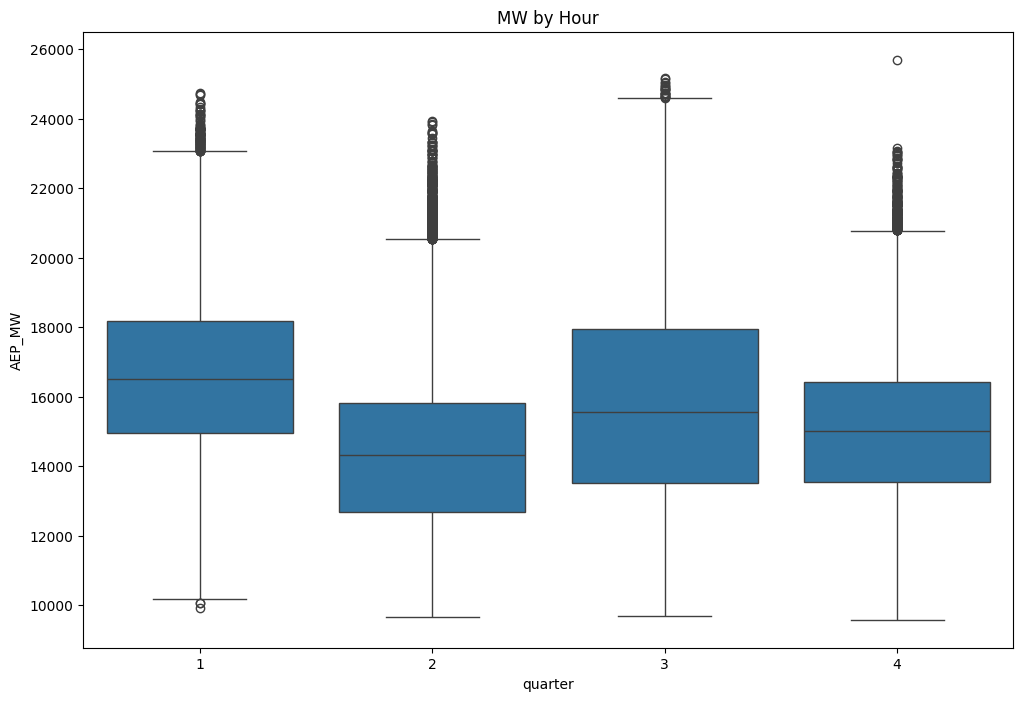

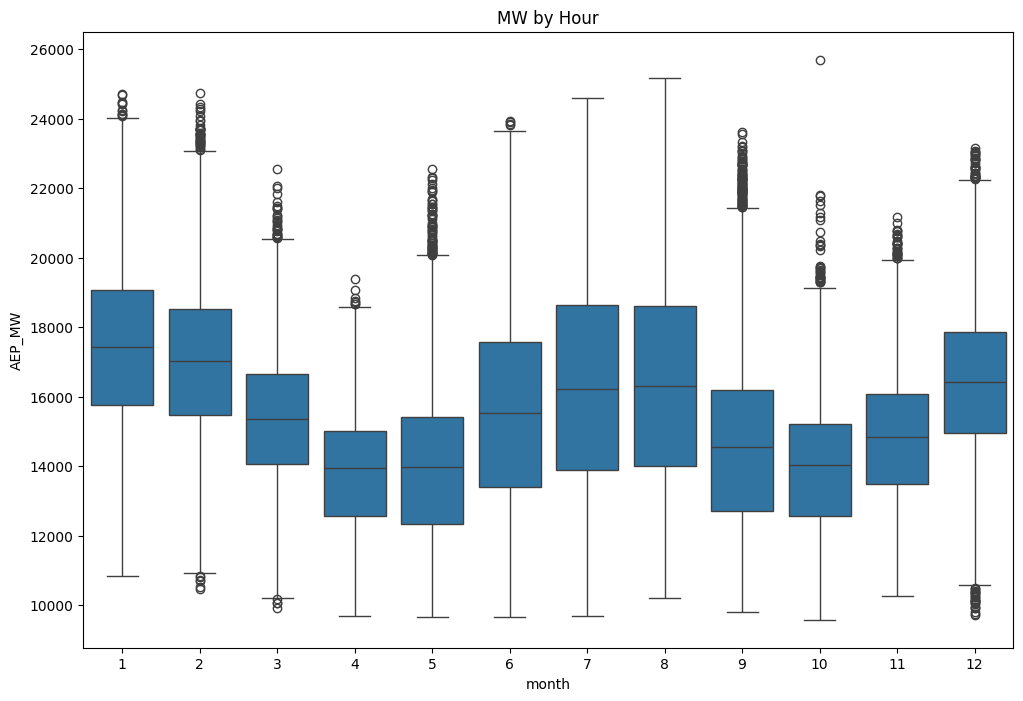

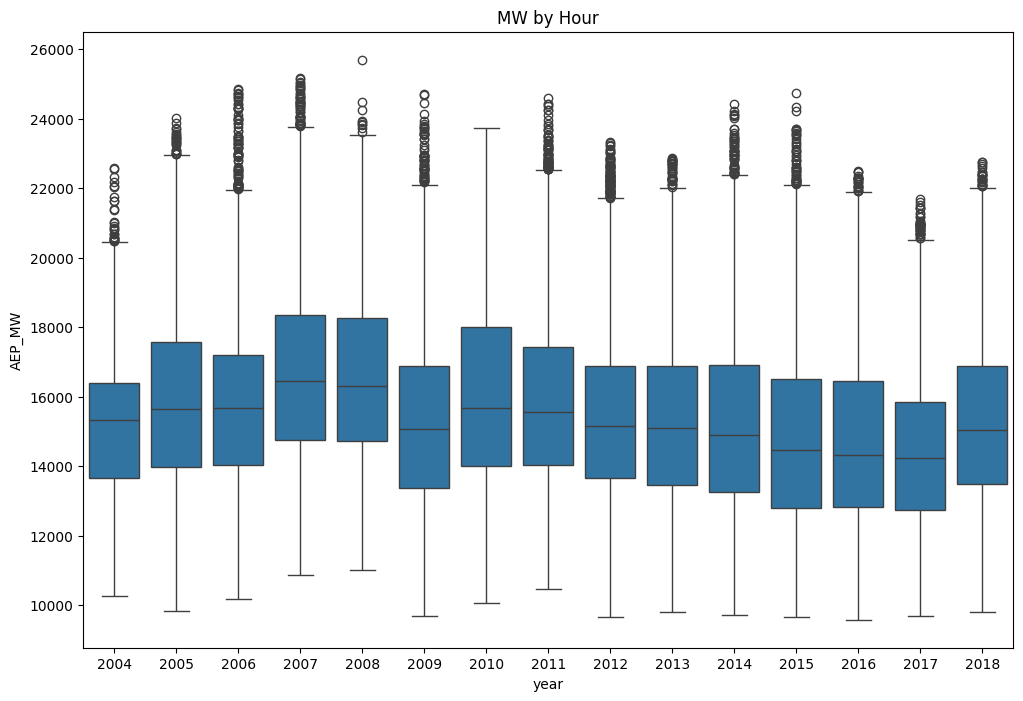

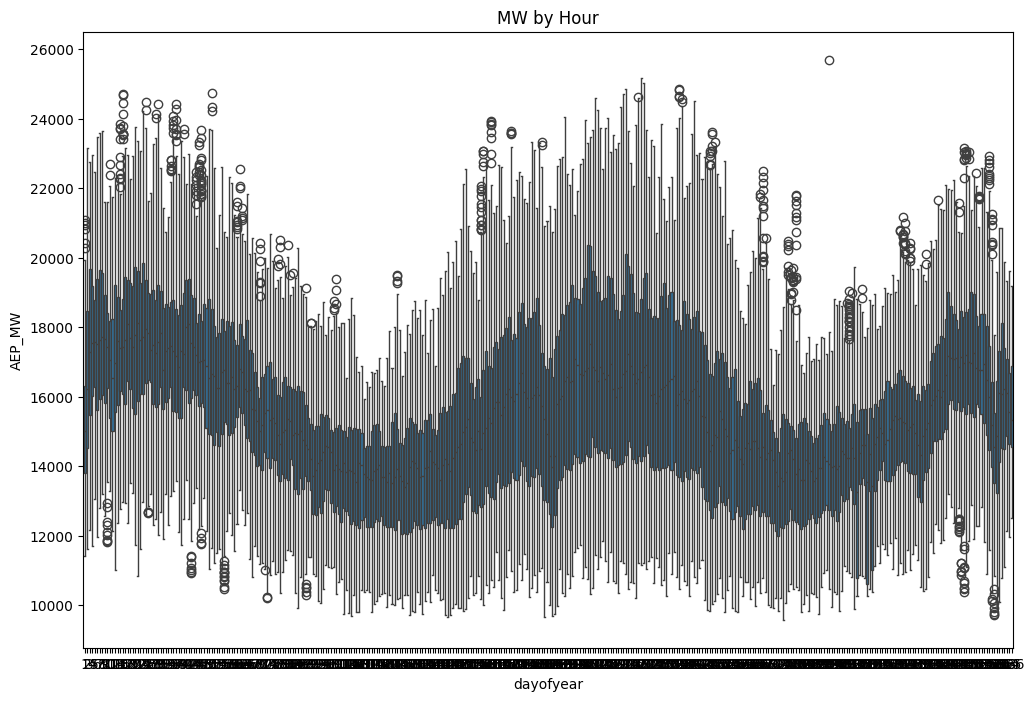

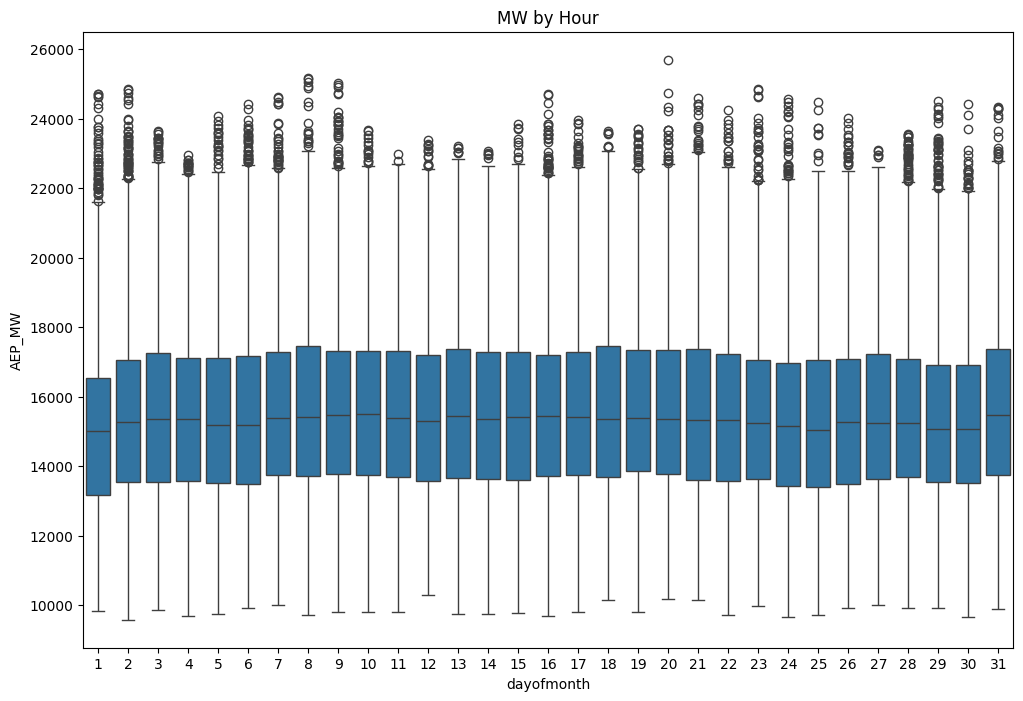

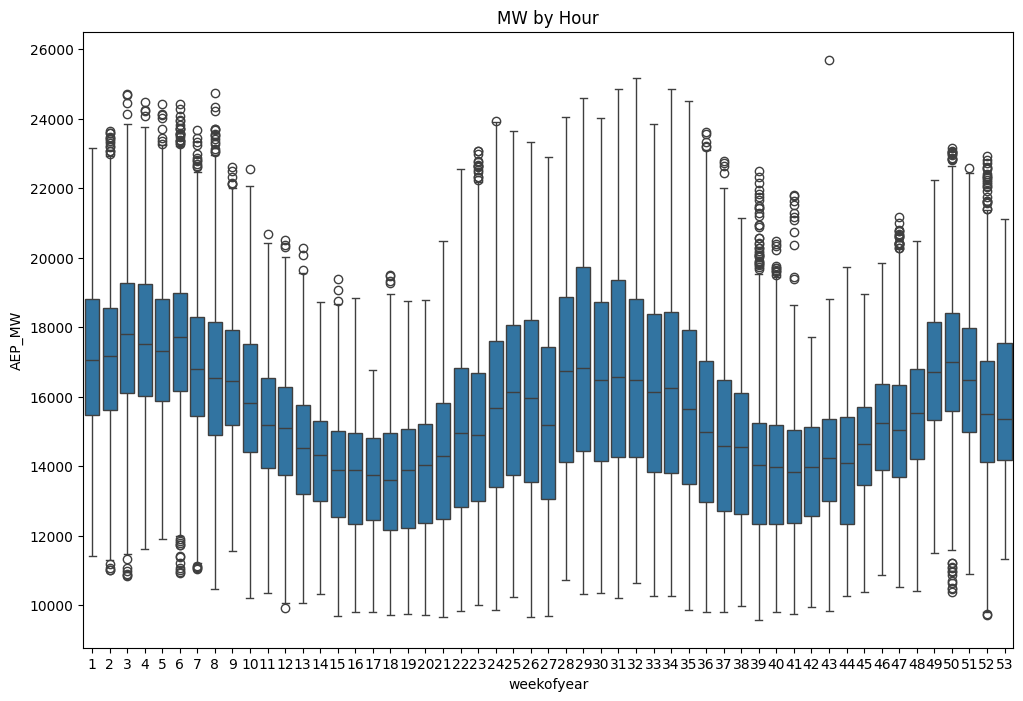

In [49]:
col = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear']
for i in col:
  fig,ax = plt.subplots(figsize = (12,8))
  sns.boxplot(data = df,x=i,y='AEP_MW')
  ax.set_title('MW by Hour')
  plt.show()

In [14]:
train = create_features(train)
test = create_features(test)

feature = col.drop('AEP_MW')
target = 'AEP_MW'

X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [41]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    n_estimators=1000,
    early_stopping_rounds=50,
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.01,
    colsample_bytree=0.8,
    subsample=0.8,
    gamma=0,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1,
    n_jobs=-1
)

reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)

[0]	validation_0-rmse:15792.79546	validation_1-rmse:14860.92133
[100]	validation_0-rmse:5978.18157	validation_1-rmse:5188.36465
[200]	validation_0-rmse:2561.49995	validation_1-rmse:2143.46076
[300]	validation_0-rmse:1543.54518	validation_1-rmse:1587.33257
[371]	validation_0-rmse:1335.05034	validation_1-rmse:1589.09692


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

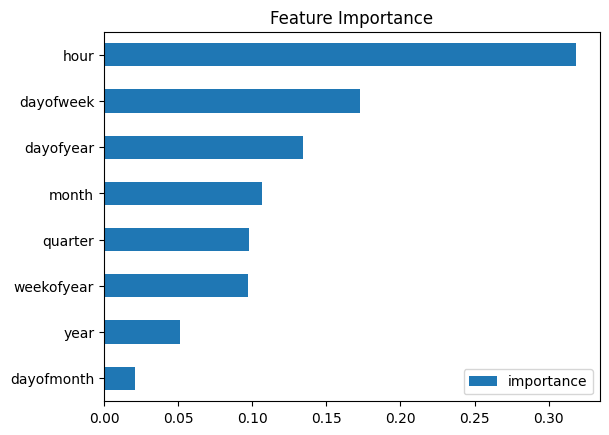

In [42]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

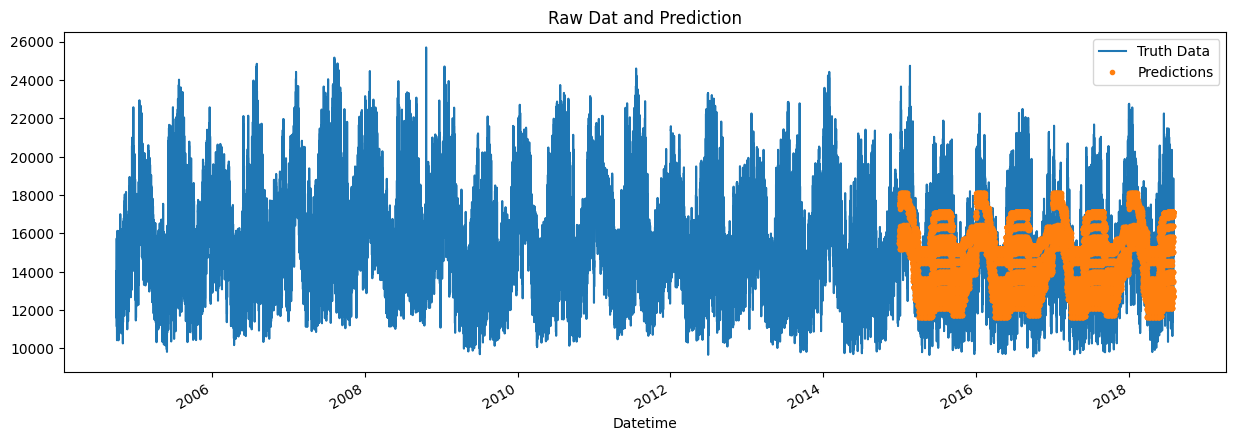

In [43]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True, suffixes=('', '_test'))
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

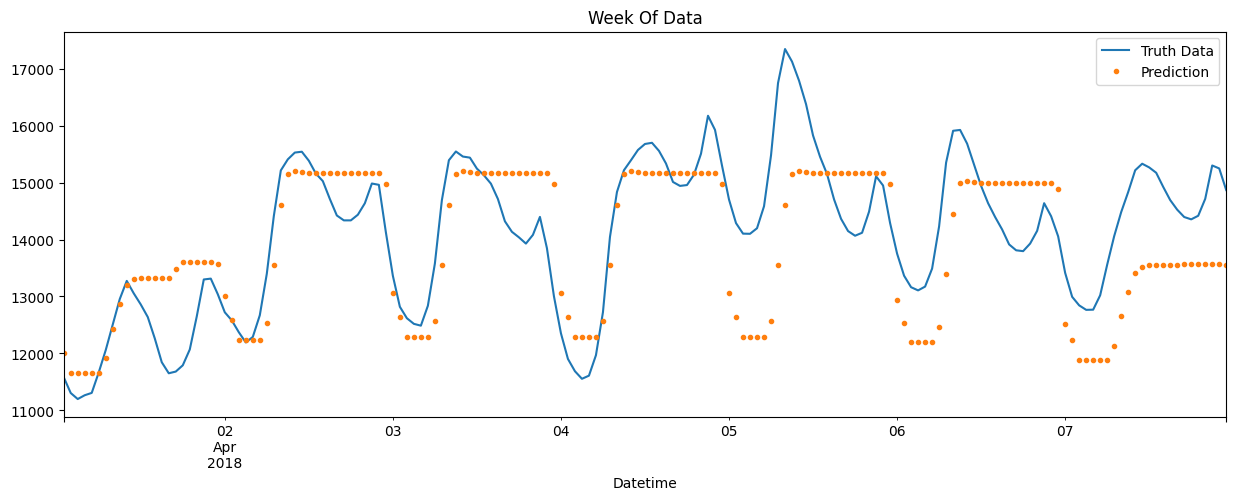

In [44]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [45]:
score = np.sqrt(mean_squared_error(y_test, test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1577.16


In [46]:
test['error'] = np.abs(test[target] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2015-02-20    5424.689779
2015-02-19    5388.253662
2018-01-06    5061.115885
2018-01-07    4451.951009
2015-01-08    4351.482747
2017-12-31    4327.884969
2015-02-16    4300.403076
2017-12-28    4029.673462
2018-01-02    3977.051229
2015-02-15    3974.987915
Name: error, dtype: float64